### Importing .pkl files

In [1]:
import pickle

with open('../notebook/X_train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('../notebook/X_test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('../notebook/y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

with open('../notebook/y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


### Initializing and training Random Forest Model 

In [4]:
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees in the forest
    random_state=42,
    n_jobs=-1              
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [6]:
# Making predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

### Evaluating the model

In [7]:
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"ROC-AUC Score: {auc_rf:.4f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110

Confusion Matrix:
 [[1382  167]
 [ 292  269]]
ROC-AUC Score: 0.8134


### Ploting ROC Curve

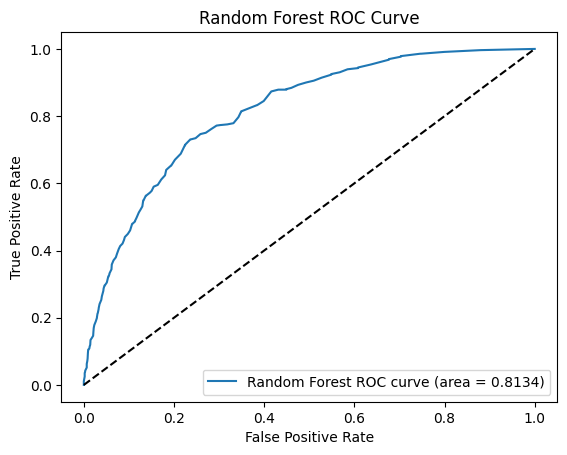

In [8]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest ROC curve (area = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--')                                               # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()
